# Whisky Classification

## pandas series and dataframes

In [32]:
# pandas is a general library for manipulating 1d and 2d arrays of data (annotated data tables) of various types
import pandas as pd

# one way for creating series
x = pd.Series([6,3,8,6], index = ["q", "w", "e", "r"])
# print(x[["w", "e"]]) to retrieve speific data we use a list of items [[]]
print("sorted index", sorted(x.index))
rex = x.reindex(sorted(x.index))
print(rex)
y = pd.Series([7,3,5,2], index = ["e", "q", "r", "t"])
print("adding operation with non matching indices which results in NaN", x+y)


# another way for creating series using dictionary
age = {"Tim":22, "Jim":43, "Pam":31, "Sam":45}
y = pd.Series(age)
# print(y) the output is ordered

# one way to create a dataframe
data = {'Name' : ['Tim', 'Jim', 'Pam', 'Sam'], 
        'Age' : [22, 43, 31, 45], 
        'Zip' : ['02123', '00456', '02654', '09832']}
z = pd.DataFrame(data, columns = ["Name", "Age", "Zip"])

print(z["Name"])
print(z.Name)
print(z.index)



sorted index ['e', 'q', 'r', 'w']
e    8
q    6
r    6
w    3
dtype: int64
adding operation with non matching indices which results in NaN e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64
0    Tim
1    Jim
2    Pam
3    Sam
Name: Name, dtype: object
0    Tim
1    Jim
2    Pam
3    Sam
Name: Name, dtype: object
RangeIndex(start=0, stop=4, step=1)


# Whisky
### load and inspect a CSV file

In [39]:
import numpy as np
import pandas as pd

whiskies = pd.read_csv("whiskies.txt")
whiskies["Region"] = pd.read_csv("regions.txt")
whiskies.head(5)
whiskies.tail(5)
# to index a dataframe by location use iloc method
# iloc for position based indexing - loc for label based indexing
whiskies.iloc[0:10]
whiskies.iloc[5:10, 0:5] # look at the rows from 5 to 10 and columns from 0 to 5
# list all the columns in the dataframe
whiskies.columns # output as below
'''
Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')
'''
# retrieve columns for flavors starting at column 2 - look above
flavors = whiskies.iloc[:, 2:14]
print(flavors)


    Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0      2          2      2          0        0      2      1      2      2   
1      3          3      1          0        0      4      3      2      2   
2      1          3      2          0        0      2      0      0      2   
3      4          1      4          4        0      0      2      0      1   
4      2          2      2          0        0      1      1      1      2   
5      2          3      1          1        0      1      1      1      0   
6      0          2      0          0        0      1      1      0      2   
7      2          3      1          0        0      2      1      2      2   
8      2          2      1          0        0      1      0      0      2   
9      2          3      2          1        0      0      2      0      2   
10     4          3      2          0        0      2      1      3      3   
11     3          2      1          0        0      3      2    

### exploring correlations and plot a correlation

### Pearson correlation estimates the linear correlations in data

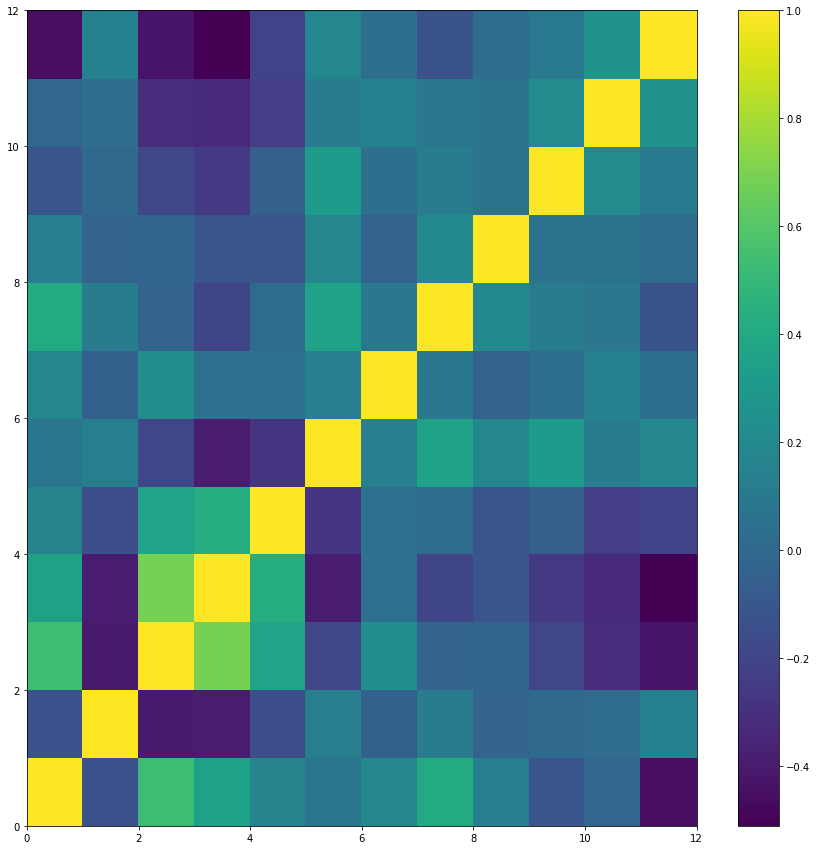

In [55]:
# compute the pairwise correlation of flavor columns in whisky DB

corr_flavors = pd.DataFrame.corr(flavors)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.pcolor(corr_flavors)
plt.colorbar()
#x_corr_flvrs = ['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy',
#       'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']
#plt.xticks(x, x_corr_flvrs)
#plt.yticks(y, x_corr_flvrs)
plt.savefig("corr_flavors.pdf")
plt.show()



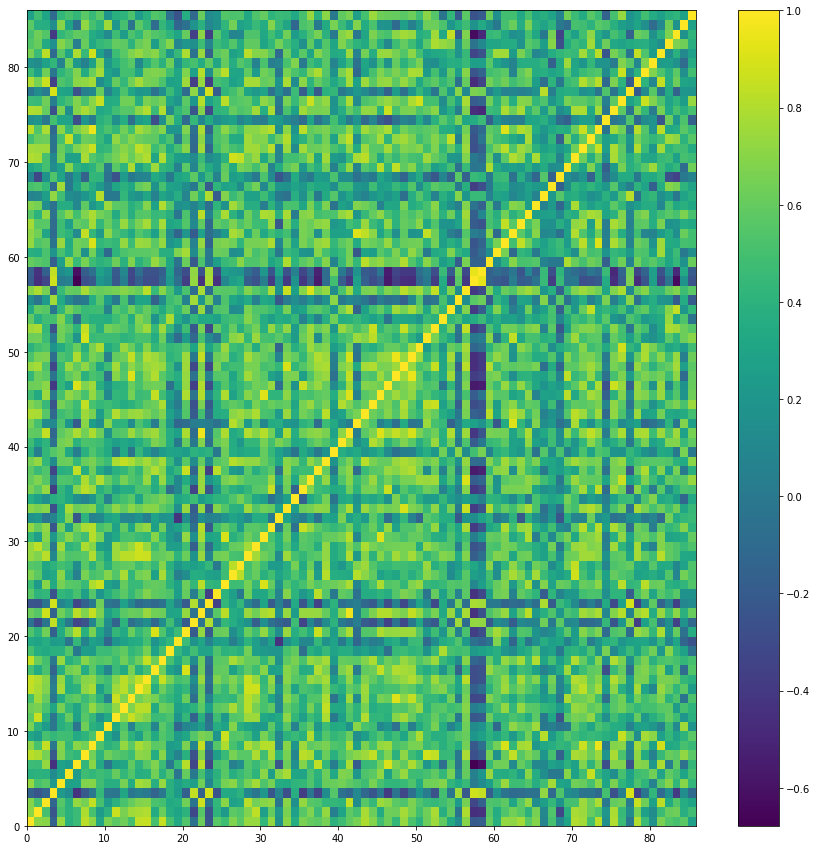

In [63]:
# compute the correlation between the distilleries and the flavors

corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(15,15))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
#x_corr_flvrs = ['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy',
#       'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']
#plt.xticks(x, x_corr_flvrs)
#plt.yticks(y, x_corr_flvrs)
plt.savefig("corr_whisky.pdf")
plt.show()



## clustering whiskies by flavor profile

In [72]:
# spectral co-clustering
# A method for finding clusters of objects by the similarity of their attributes

from sklearn.cluster.bicluster import SpectralCoclustering

model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
# look at the clusters we just made
print(model.rows_)
print(np.sum(model.rows_, axis=1))
# [20  5 19 17  6 19] meaning 20 whiskies belong to cluster no 0, 5 belong to cluster no 1 and so on
model.row_labels_

"""
array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0],
      dtype=int32)
      meaning: observation no 0 belongs to cluster no 5
      observation no 1 belongs to cluster no 2
      observation no 2 belongs to cluster no 3 ...
      all the numbers have to be between o-5 bc we specified 6 clsuters
"""


[[False False False False False  True False False False False False  True
  False  True False False  True False  True False False False False False
  False False False False False False False False  True  True  True False
  False False  True False  True False False False False  True False  True
   True False False False False False  True False False False False  True
  False False False False False False False False False  True False False
   True False False False False False False False  True False False  True
  False  True]
 [False False False False False False False False False False False False
  False False False False False False False  True False False False False
  False False False False False False False False False False False False
  False False False  True False False False False False False False False
  False False False False False False False  True False False False False
  False False False False False False  True False  True False False False
  False False False Fal

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0],
      dtype=int32)

### comparing correlation matrices

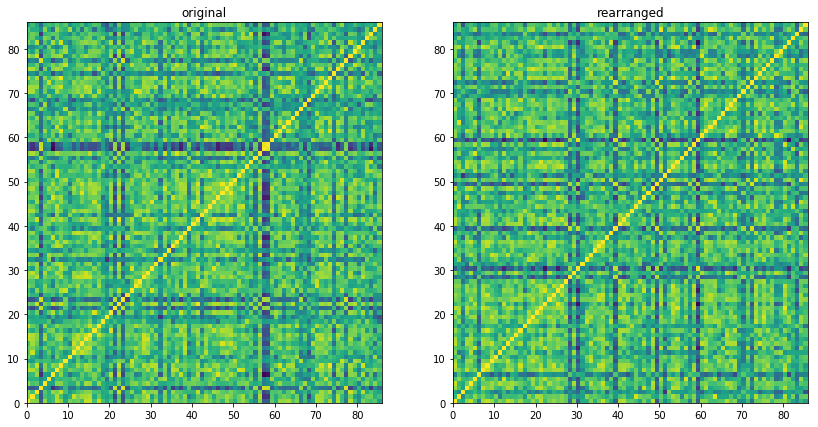

In [88]:
whiskies['Group'] = pd.Series(model.row_labels_, index=whiskies.index)
whiskies = whiskies.iloc[np.argsort(model.row_labels_)] #iloc or loc?
whiskies = whiskies.reset_index(drop=True)
correlations = pd.DataFrame.corr(whiskies.iloc[:, 2:14].transpose())
correlations = np.array(correlations)
#print(correlations)
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("rearranged")
plt.axis("tight")
plt.savefig("correlations.pdf")


